In [115]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import warnings
import keras

## neural network library
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Input
from mlxtend.plotting import plot_confusion_matrix
import pickle
import joblib
from keras.callbacks import EarlyStopping



In [83]:
# Suppress all deprecation warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


In [84]:
# load the data set
diabetes_data = pd.read_csv("diabetes.csv")
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [85]:
# info about the dataset
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [86]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [87]:
# data cleaning
# glucose, BP, insulin, skin thickness, BMI - replace 0 with NaN

# create a copy of the dataset
clean_diabetes = diabetes_data.copy()

# choose which columns need to be replace
columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
clean_diabetes[columns]= clean_diabetes[columns].replace({0 : np.nan})

In [88]:
clean_diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [89]:
clean_diabetes.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

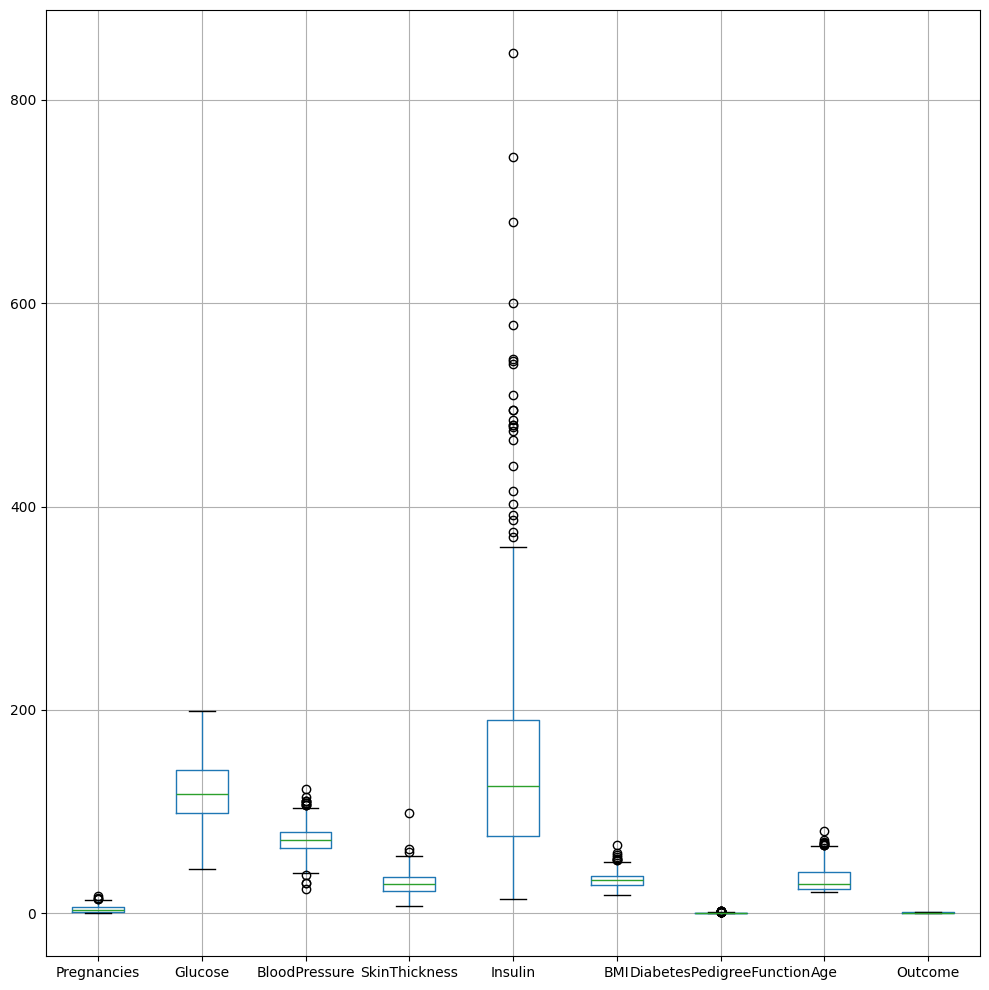

In [90]:
clean_diabetes.boxplot(figsize=(10,10))
plt.tight_layout()
plt.show()

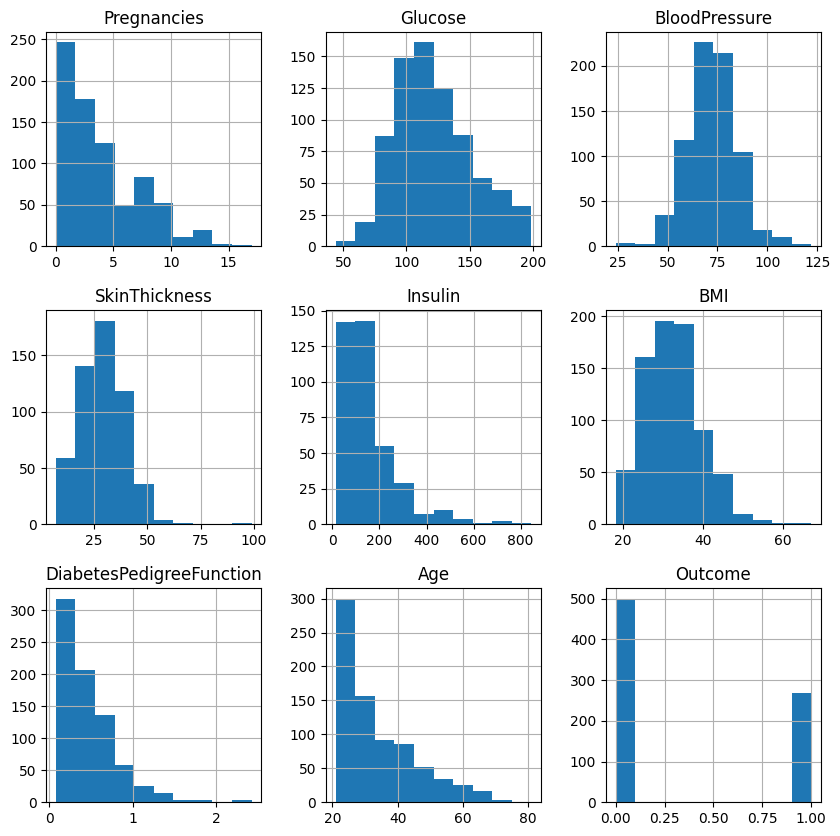

In [91]:
# create a histogram
clean_diabetes.hist(bins=10, figsize=(10, 10))
plt.show()

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.128135       0.214178       0.100239   
Glucose                      0.128135  1.000000       0.223192       0.228043   
BloodPressure                0.214178  0.223192       1.000000       0.226839   
SkinThickness                0.100239  0.228043       0.226839       1.000000   
Insulin                      0.082171  0.581186       0.098272       0.184888   
BMI                          0.021719  0.232771       0.289230       0.648214   
DiabetesPedigreeFunction    -0.033523  0.137246      -0.002805       0.115016   
Age                          0.544341  0.267136       0.330107       0.166816   
Outcome                      0.221898  0.494650       0.170589       0.259491   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies               0.082171  0.021719                 -0.033523   
Glucose                   0.581186  0.232

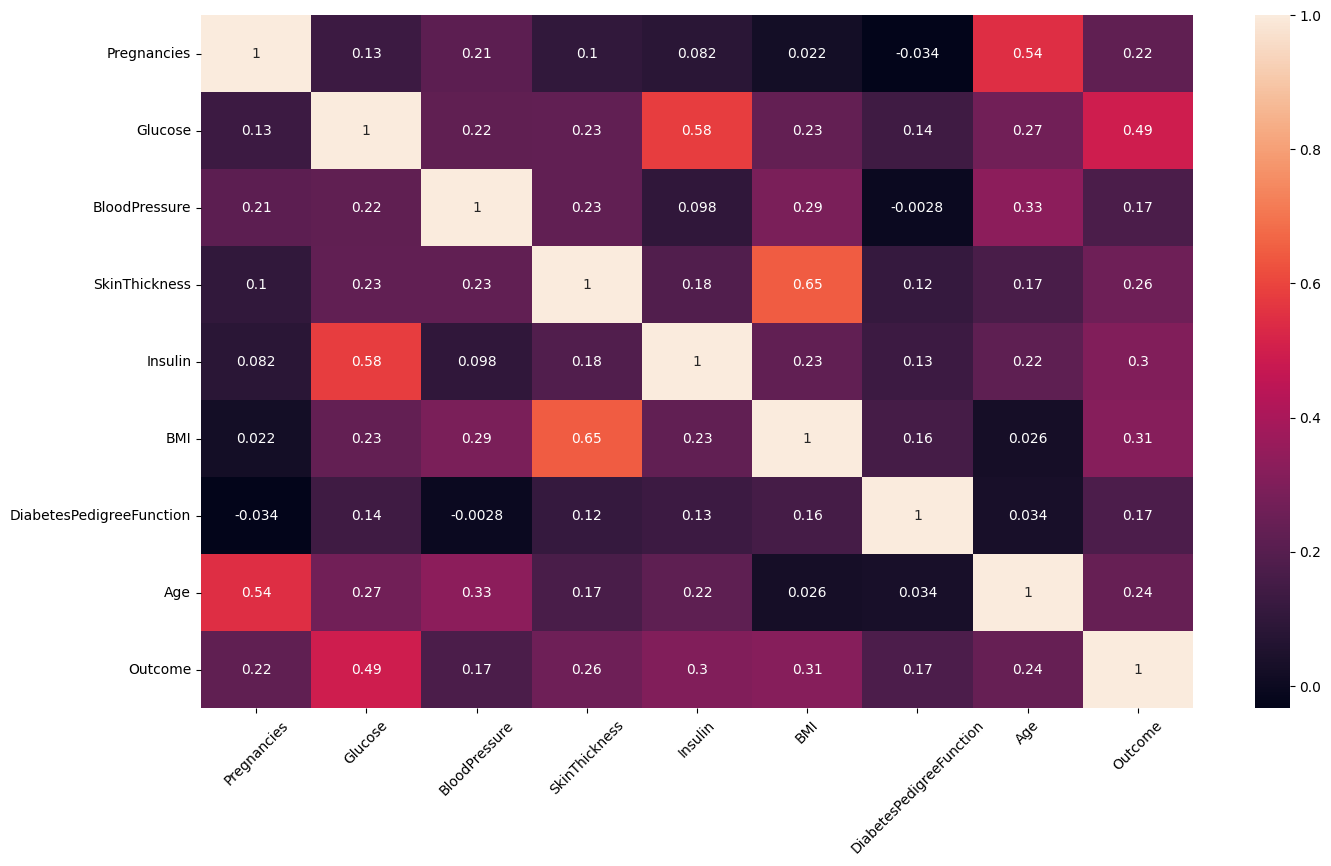

In [92]:
# Create a correlation matrix
corr = clean_diabetes.corr()
print(corr)
fig, ax=plt.subplots(figsize=(16,9))
sns.heatmap(corr, annot=True, square=False, ax=ax)
plt.xticks(rotation= 45)
plt.show()

<Figure size 1600x800 with 0 Axes>

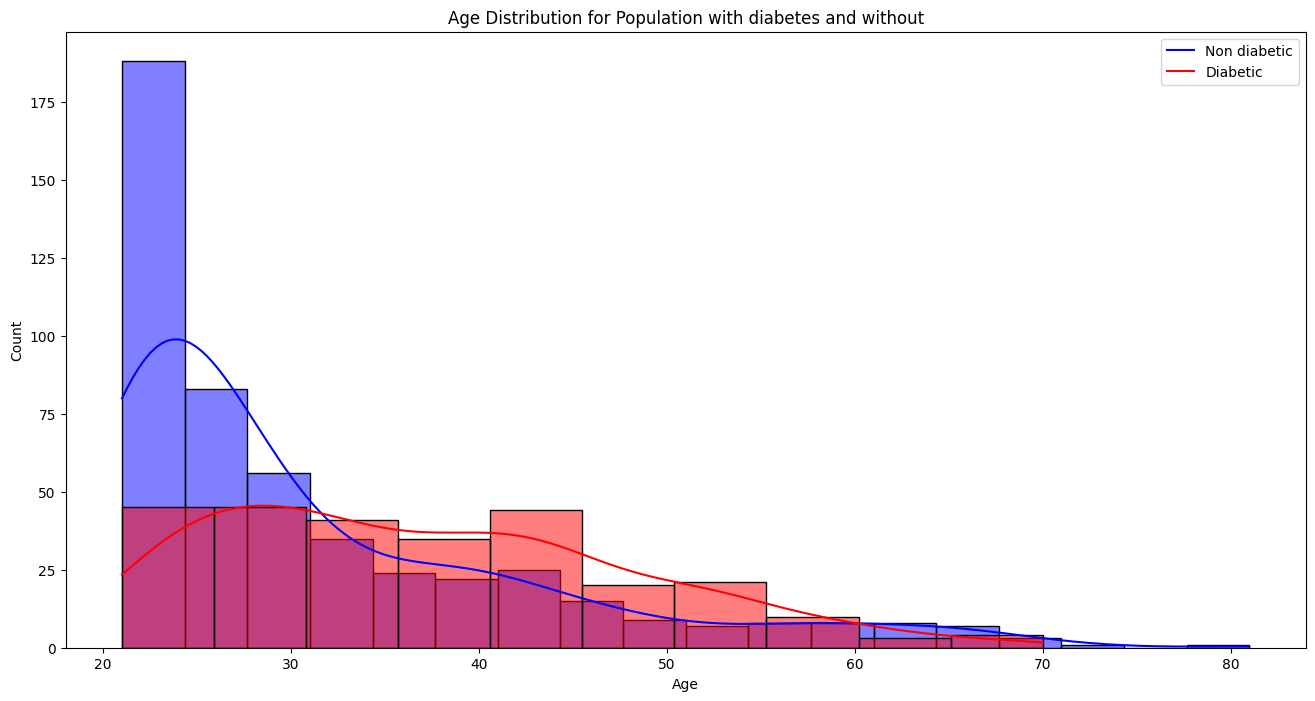

In [114]:
# Age distribution of diabetic and non diabetic people
plt.figure(figsize=(16,8))
ax = sns.histplot(clean_diabetes["Age"][clean_diabetes.Outcome == 0], color="blue", kde=True), sns.histplot(clean_diabetes["Age"][clean_diabetes.Outcome == 1], color="red", kde=True)
plt.legend(['Non diabetic', 'Diabetic'])
plt.title('Age Distribution for Population with diabetes and without')
plt.show()


In [93]:
# glucose, BP, skin thickness has a normal distribution, so can replace with the mean
# insulin and BMI is skewed, so replace with median
# filling glucose, blood pressure with mean
# filling skin thickness and insulin and BMI with median

clean_diabetes['Glucose'] = clean_diabetes['Glucose'].fillna(clean_diabetes['Glucose'].mean())
clean_diabetes['BloodPressure'] = clean_diabetes['BloodPressure'].fillna(clean_diabetes['BloodPressure'].mean())
clean_diabetes['SkinThickness'] = clean_diabetes['SkinThickness'].fillna(clean_diabetes['SkinThickness'].median())
clean_diabetes['Insulin'] = clean_diabetes['Insulin'].fillna(clean_diabetes['Insulin'].median())
clean_diabetes['BMI'] = clean_diabetes['BMI'].fillna(clean_diabetes['BMI'].median())

In [94]:
clean_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [95]:
# counting the number of diabetic and non diabetic
# check if the data set is balanced or not
clean_diabetes['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

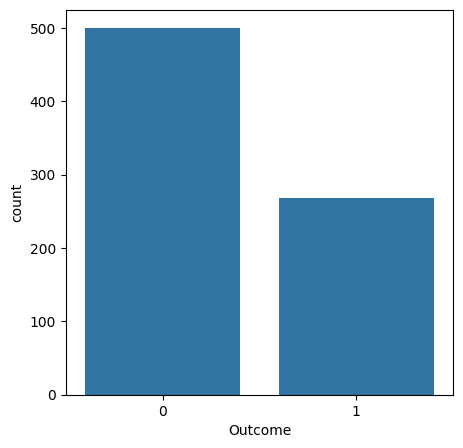

In [96]:
# plot a chart
plt.figure(figsize=(5,5))
sns.countplot(x='Outcome', data = clean_diabetes)
plt.show()

In [97]:
#define independent and dependent variables
x = clean_diabetes.iloc[:, :-1]
y = clean_diabetes.iloc[:, -1]


In [98]:
# split the dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=32)

In [99]:
# feature scaling
# Fit scaler on training data
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)  # Fit and transform training data
x_test_scaled = sc.transform(x_test)  # Only transform, do not fit again

# Train your model
logreg = LogisticRegression()
logreg.fit(x_train_scaled, y_train)

# Save the scaler and the model
with open('scaler.pkl', 'wb') as f:
    pickle.dump(sc, f)  # Save the fitted scaler

with open('logreg_model.pkl', 'wb') as f:
    pickle.dump(logreg, f)  # Save the trained model

print("Scaler and model saved successfully!")

Scaler and model saved successfully!


In [100]:
y_pred = logreg.predict(x_test_scaled)

In [101]:
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

,Actual,Predicted
642,1,0
695,1,0
453,0,0
565,0,0
99,1,1
...,...,...
455,1,1
354,0,0
216,1,0
509,0,0


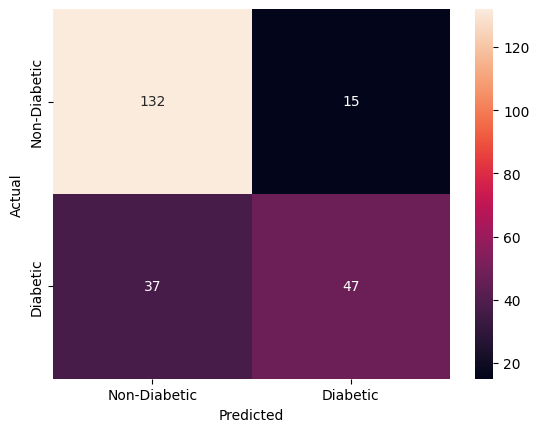

In [102]:
# Create a confusion matrix
conf = confusion_matrix(y_test, y_pred)
sns.heatmap(conf, annot=True, fmt='.0f')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks(ticks=[0.5, 1.5], labels=['Non-Diabetic', 'Diabetic'])
plt.yticks(ticks=[0.5, 1.5], labels=['Non-Diabetic', 'Diabetic'])
plt.show()

In [ ]:
# Evaluate model performance
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.90      0.84       147
           1       0.76      0.56      0.64        84

    accuracy                           0.77       231
   macro avg       0.77      0.73      0.74       231
weighted avg       0.77      0.77      0.77       231



In [104]:
auc = roc_auc_score(y_test, y_pred)
print('AUC: %f' %auc)

AUC: 0.728741


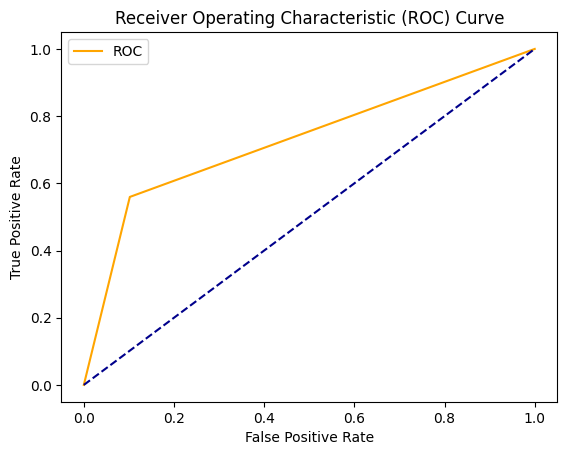

In [105]:
fpr, tpr = roc_curve(y_test, y_pred)[0:2]

plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [ ]:
# Create a neural network

# initialise
model = Sequential()

# Input Layer (8 features)
model.add(Input(shape=(8,)))


# Hidden Layer 1
model.add(Dense(units=25, kernel_initializer='he_uniform', activation='relu'))
model.add(Dropout(0.3))


# Hidden Layer 2
model.add(Dense(units=15, kernel_initializer='he_uniform', activation='relu'))
model.add(Dropout(0.2))


# Output Layer
model.add(Dense(units=1, kernel_initializer='glorot_uniform', activation='sigmoid'))

# Compile
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Model
history = model.fit(x_train_scaled, y_train, batch_size=25, epochs=150, validation_split=0.25, callbacks=[early_stopping])

Epoch 1/150
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6521 - loss: 0.6625 - val_accuracy: 0.7037 - val_loss: 0.5498
Epoch 2/150
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6874 - loss: 0.5728 - val_accuracy: 0.6741 - val_loss: 0.5345
Epoch 3/150
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6354 - loss: 0.6558 - val_accuracy: 0.6815 - val_loss: 0.5227
Epoch 4/150
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7003 - loss: 0.5884 - val_accuracy: 0.6741 - val_loss: 0.5174
Epoch 5/150
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7468 - loss: 0.5174 - val_accuracy: 0.6889 - val_loss: 0.5136
Epoch 6/150
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7440 - loss: 0.5167 - val_accuracy: 0.6963 - val_loss: 0.5099
Epoch 7/150
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7350 - loss: 0.5252 - val_accuracy: 0.7037 - val_loss: 0.5079
Epoch 8/150
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7030 - loss: 0.5142 - val_accuracy: 0.7111 - v

In [ ]:
# Evaluate model performance
val_accuracy = np.mean(history.history['val_accuracy'])
print("\n%s: %.2f%%" % ('val_accuracy is', val_accuracy*100))



val_accuracy is: 70.93%


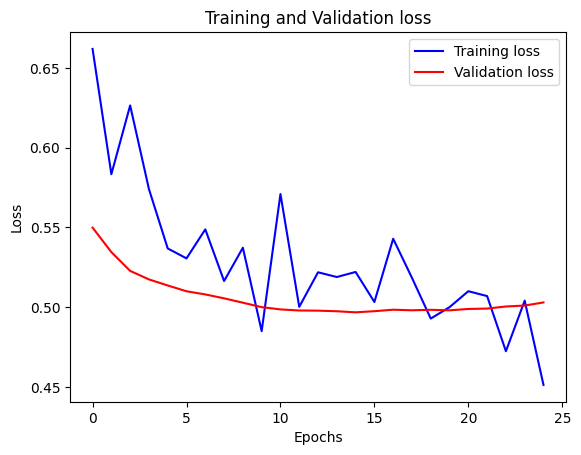

In [108]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], "blue", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"red", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")
plt.show()

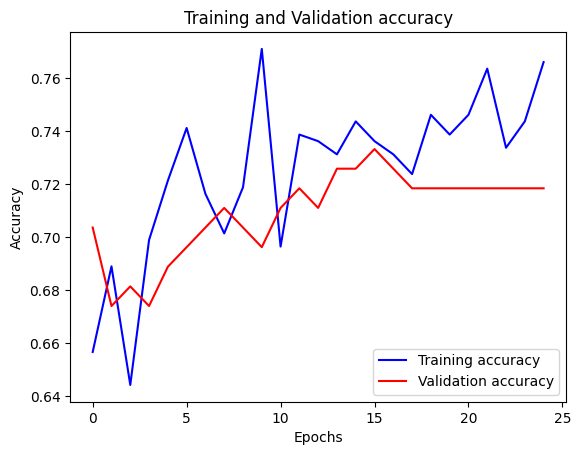

In [109]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']], "blue", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']],"red", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [110]:
# Predicting the test set results
y_pred_ann = model.predict(x_test)
y_pred_ann = np.where(y_pred > 0.4, 1, 0)
np.set_printoptions()

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


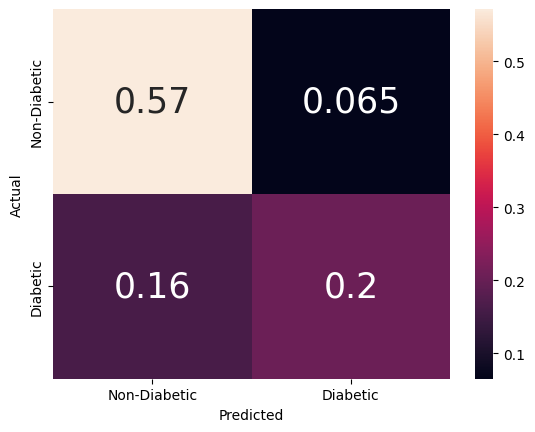

In [111]:
cf_matrix = confusion_matrix(y_test, y_pred_ann)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot = True, annot_kws = {'size':25})
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks(ticks=[0.5, 1.5], labels=['Non-Diabetic', 'Diabetic'])
plt.yticks(ticks=[0.5, 1.5], labels=['Non-Diabetic', 'Diabetic'])
plt.show()

In [112]:
print(classification_report(y_test, y_pred_ann))

              precision    recall  f1-score   support

           0       0.78      0.90      0.84       147
           1       0.76      0.56      0.64        84

    accuracy                           0.77       231
   macro avg       0.77      0.73      0.74       231
weighted avg       0.77      0.77      0.77       231

